In [1]:
import os, seaborn, pandas

import pyensembl
release = pyensembl.EnsemblRelease()

import matplotlib, matplotlib.pyplot
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['axes.labelsize'] = 25
matplotlib.rcParams['xtick.labelsize'] = 17
matplotlib.rcParams['ytick.labelsize'] = 17

# 0. user-defined variables

In [2]:
DEG_folder = '/Users/alopez/projects_isb/cdi/results/deseq2/filtered/'
regulon_memberships_file = '/Users/alopez/projects_isb/cdi/results/miner/results_IA9/mechanistic_inference_results/regulons_annotated.csv'
regulon_thresholds_file = '/Users/alopez/projects_isb/cdi/results/regulons/thresholds/results.txt'

# 1. read data

## 1.1. get DEG union

In [3]:
degs = {}
deg_union = []

files = os.listdir(DEG_folder)
deg_files = [DEG_folder+file for file in files if '.tsv' in file]

for file in deg_files:
    tag = file.split('_filtered')[0].split('/')[-1]
    trend = tag.split('_')[-1]
    condition = tag.split('_{}'.format(trend))[0]
    
    if condition not in degs:
        degs[condition] = {}
    if trend not in degs[condition]:
        degs[condition][trend] = []
    
    with open(file, 'r') as f:
        next(f)
        for line in f:
            v = line.split('\t')
            deg = v[0]

            if deg not in deg_union:
                deg_union.append(deg)
            
            degs[condition][trend].append(deg)
                
print('DEG found: {}'.format(len(deg_union)))

DEG found: 1967


## 1.2. get regulon memberships

In [4]:
regulon_memberships = {} 
with open(regulon_memberships_file, 'r') as f:
    next(f)
    for line in f:
        v = line.split(',')
        regulon_id = int(v[1])
        regulator = v[2]
        gene = v[3].replace('\n', '')
        identifier = (regulon_id, regulator)
        
        if identifier not in regulon_memberships:
            regulon_memberships[identifier] = [gene]
        else:
            regulon_memberships[identifier].append(gene)
print('regulon memberships for {} regulons'.format(len(regulon_memberships)))

regulon memberships for 3695 regulons


## 1.3. get regulon DEG thresholds

In [5]:
regulon_thresholds = {}
with open(regulon_thresholds_file, 'r') as f:
    next(f)
    for line in f:
        v = line.split()
        regulon_size = int(v[0])
        threshold = int(v[1])
        regulon_thresholds[regulon_size] = threshold
print(regulon_thresholds)

{3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 5, 38: 5, 39: 5, 40: 5, 41: 5, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 5, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 6, 54: 6, 55: 6, 56: 6, 57: 6, 58: 6, 59: 6, 60: 6, 61: 6, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 7, 71: 7, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 7, 81: 7, 82: 7, 83: 7, 84: 7, 85: 7, 86: 7, 87: 7, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 8, 94: 8, 95: 8, 96: 8, 97: 8, 98: 8, 99: 8, 100: 8, 101: 8, 102: 8, 103: 8, 104: 8, 105: 8, 106: 9, 107: 9, 108: 9, 109: 9, 110: 9, 111: 9, 112: 9, 113: 9, 114: 9, 115: 9, 116: 9, 117: 9, 118: 9, 119: 9, 120: 9, 121: 9, 122: 9, 123: 9, 124: 9, 125: 10, 126: 10, 127: 10, 128: 10, 129: 10, 130: 10, 131: 10, 132: 10, 133: 10, 134: 10, 135: 10, 136: 10, 137: 10, 138: 10, 1

# 2. define regulon activity based on DEGs

## 2.1. define the regulons that have at least one DEG

685 regulons found
[(0, 'ENSG00000012223'), (2, 'ENSG00000164330'), (3, 'ENSG00000164330'), (7, 'ENSG00000164330'), (9, 'ENSG00000164330'), (18, 'ENSG00000107485'), (24, 'ENSG00000107485'), (27, 'ENSG00000132170'), (31, 'ENSG00000132170'), (34, 'ENSG00000178573')]


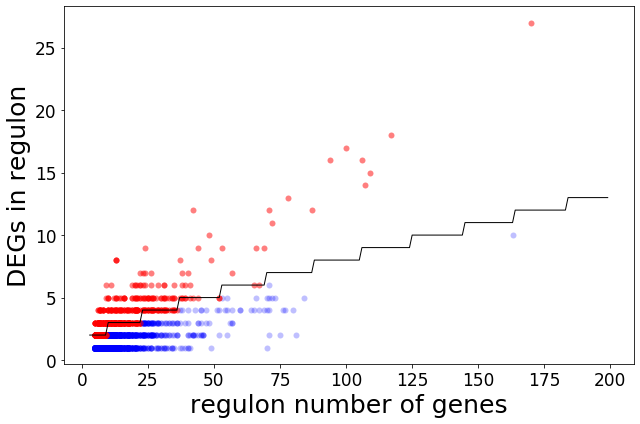

In [6]:
differential_regulons = []
for regulon_identifier in regulon_memberships:
    a = len(list(set(deg_union) & set(regulon_memberships[regulon_identifier])))
    b = len(regulon_memberships[regulon_identifier])
    proportion = a/b
    if a >= regulon_thresholds[b]:
        matplotlib.pyplot.plot(b, a, 'o', color='red', alpha=0.5, mew=0)
        #print(count, regulon_identifier, a, b, proportion)
        differential_regulons.append(regulon_identifier)
    elif proportion > 0:
        matplotlib.pyplot.plot(b, a, 'o', color='blue', alpha=0.25, mew=0)
        
print('{} regulons found'.format(len(differential_regulons)))
print(differential_regulons[:10])
        
matplotlib.pyplot.plot(list(regulon_thresholds.keys()), list(regulon_thresholds.values()), '-', color='black', lw=1)
matplotlib.pyplot.xlabel('regulon number of genes')
matplotlib.pyplot.ylabel('DEGs in regulon')
matplotlib.pyplot.tight_layout()

In [7]:
# check how many TFs are behid the selected regulons
print('regulons: {}'.format(len(differential_regulons)))
TFs = [element[1] for element in differential_regulons]
unique = list(set(TFs))
print('TFs: {}'.format(len(unique)))
print(unique[:10])

regulons: 685
TFs: 271
['ENSG00000090447', 'ENSG00000028277', 'ENSG00000185630', 'ENSG00000184486', 'ENSG00000092607', 'ENSG00000125482', 'ENSG00000102034', 'ENSG00000065970', 'ENSG00000167034', 'ENSG00000150281']


# 3. differential regulon activity

In [8]:
ACTM = []
conditions = list(degs.keys())

print(conditions[:5])
print(differential_regulons[:5])

for condition in conditions:
    row = []
    upregulated_genes = degs[condition]['up']
    downregulated_genes = degs[condition]['down']
    
    for regulon in differential_regulons:
        
        regulon_members = regulon_memberships[regulon]
        regulon_size = len(regulon_members)
        
        # is_regulon_red
        intersect = len(list(set(upregulated_genes) & set(regulon_members)))
        #print(intersect, regulon_size, 'red')
        if intersect >= regulon_thresholds[regulon_size]:
            is_red = 1
        else:
            is_red = 0
        
        # is regulon_blue
        intersect = len(list(set(downregulated_genes) & set(regulon_members)))
        #print(intersect, regulon_size, 'blue')

        if intersect >= regulon_thresholds[regulon_size]:
            is_blue = 1
        else:
            is_blue = 0

        # regulon activity
        activity = is_red - is_blue
        
        # check that is not both up and down
        if abs(activity) > 1:
            raise ValueError('wow!')
        
        # append activities for each regulon
        row.append(activity)
    # append activities for a particular conditions
    ACTM.append(row)

['mono_time_twentyfour_vs_time_zero', 'mono_time_one_vs_time_zero', 'mono_time_four_vs_time_zero', 'co_time_one_vs_time_zero', 'co_time_four_vs_time_zero']
[(0, 'ENSG00000012223'), (2, 'ENSG00000164330'), (3, 'ENSG00000164330'), (7, 'ENSG00000164330'), (9, 'ENSG00000164330')]


In [9]:
conditions

['mono_time_twentyfour_vs_time_zero',
 'mono_time_one_vs_time_zero',
 'mono_time_four_vs_time_zero',
 'co_time_one_vs_time_zero',
 'co_time_four_vs_time_zero',
 'co_time_twentyfour_vs_time_zero',
 'co_vs_mono_time_zero']

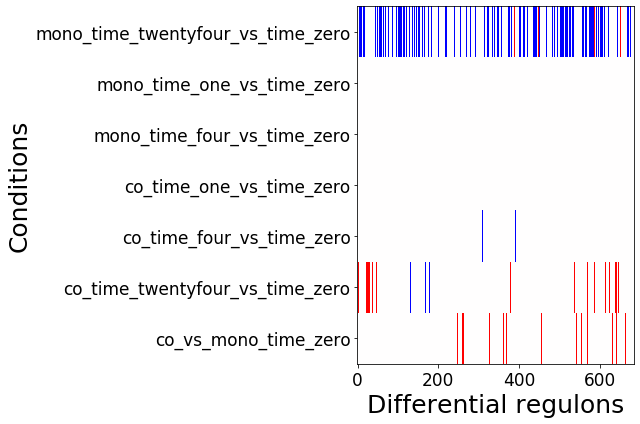

In [10]:
matplotlib.pyplot.imshow(ACTM, cmap='bwr', vmin=-1, vmax=1, aspect='auto')

matplotlib.pyplot.yticks(list(range(7)), conditions)
matplotlib.pyplot.xlabel('Differential regulons')
matplotlib.pyplot.ylabel('Conditions')
matplotlib.pyplot.tight_layout()

## 3.2 clustering

### format dataframe

In [11]:
df = pandas.DataFrame(ACTM)
row_map = {}
for i in range(len(conditions)):
    row_map[i] = conditions[i]
df.rename(index=row_map, inplace=True) 
df

,0,1,2,3,4,5,6,7,8,9,...,675,676,677,678,679,680,681,682,683,684
mono_time_twentyfour_vs_time_zero,0,0,0,0,-1,0,-1,0,-1,0,...,0,-1,0,0,0,-1,0,-1,0,0
mono_time_one_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mono_time_four_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_one_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_four_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_twentyfour_vs_time_zero,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,-1,0,0,0,0,0
co_vs_mono_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# update column names to TF gene names
column_map = {}
for i in range(len(differential_regulons)):
    TF_id = differential_regulons[i][1]
    gene_name = release.gene_by_id(TF_id).name
    column_map[i] = gene_name
df.rename(columns=column_map, inplace=True)

In [13]:
# remove empty columns
differential_regulons = df.isin([0]).sum(axis=0) < df.shape[0] # remove if the number of zeros is the same as the size of the column
selected = []
a=differential_regulons.to_list()
for i in range(len(a)):
    if a[i] == True:
        selected.append(i)
        
simplyfied_df = df.iloc[:, selected]
simplyfied_df.head()

,LTF,EBF1,EBF1,GATA3,GATA3,PPARG,PPARG,MAF,MAF,SOX13,...,KLF1,RUNX1,RUNX1,ATF4,NFIA,ZNF75A,RXRA,ZBTB14,ESRRG,SREBF1
mono_time_twentyfour_vs_time_zero,0,0,-1,0,-1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,0,-1,-1
mono_time_one_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mono_time_four_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_one_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_four_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
regulators = simplyfied_df.columns.to_list()
regulators_unique = list(set(regulators))
print('regulators: {}; unique regulators: {}'.format(len(regulators), len(regulators_unique)))

regulators: 338; unique regulators: 205


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


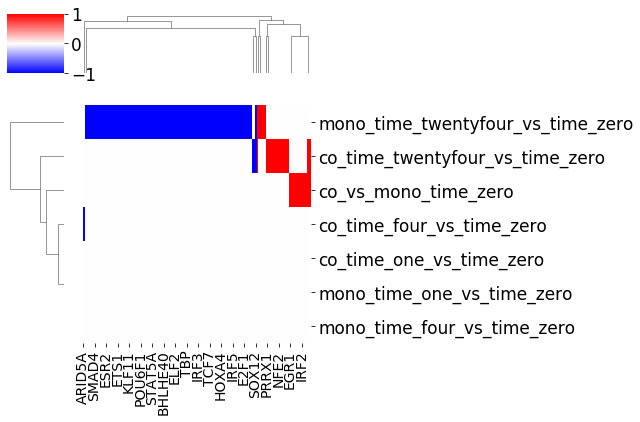

In [15]:
g = seaborn.clustermap(simplyfied_df, cmap="bwr", vmin=-1, vmax=1, figsize=(9, 6))
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
matplotlib.pyplot.tight_layout()

In [16]:
# remove empty rows
df = simplyfied_df[abs(simplyfied_df.sum(axis=1)) > 1]
df.head()

,LTF,EBF1,EBF1,GATA3,GATA3,PPARG,PPARG,MAF,MAF,SOX13,...,KLF1,RUNX1,RUNX1,ATF4,NFIA,ZNF75A,RXRA,ZBTB14,ESRRG,SREBF1
mono_time_twentyfour_vs_time_zero,0,0,-1,0,-1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,0,-1,-1
co_time_four_vs_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co_time_twentyfour_vs_time_zero,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,-1,0,0
co_vs_mono_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


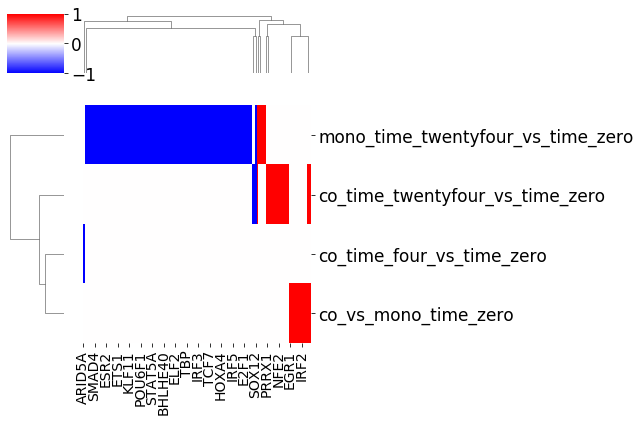

In [17]:
g = seaborn.clustermap(df, cmap="bwr", vmin=-1, vmax=1, figsize=(9, 6))
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
matplotlib.pyplot.tight_layout()

In [ ]:
# further reduce

In [19]:
abs(df.sum(axis=1))

mono_time_twentyfour_vs_time_zero    238
co_time_four_vs_time_zero              4
co_time_twentyfour_vs_time_zero       36
co_vs_mono_time_zero                  32
dtype: int64

In [20]:
reduced = df[abs(df.sum(axis=1)) > 5]
reduced.head()

,LTF,EBF1,EBF1,GATA3,GATA3,PPARG,PPARG,MAF,MAF,SOX13,...,KLF1,RUNX1,RUNX1,ATF4,NFIA,ZNF75A,RXRA,ZBTB14,ESRRG,SREBF1
mono_time_twentyfour_vs_time_zero,0,0,-1,0,-1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,0,-1,-1
co_time_twentyfour_vs_time_zero,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,-1,0,0
co_vs_mono_time_zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


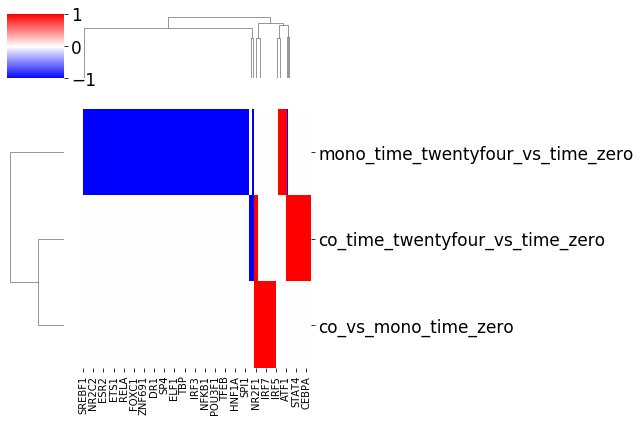

In [31]:
g = seaborn.clustermap(reduced, cmap="bwr", vmin=-1, vmax=1, figsize=(9, 6), xticklabels=15)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
matplotlib.pyplot.tight_layout()

In [33]:
reduced.to_csv('testing.txt', sep='\t')
